---
title: "Lab 4 - Eldridge"
format:
  html:
    theme: darkly
embed-resource: true
---

In [2]:
#1 - Starbucks
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

url = 'https://worldpopulationreview.com/state-rankings/starbucks-stores-by-state'

response = requests.get(url)
response.raise_for_status()

soup = BeautifulSoup(response.content, 'html.parser')

table = soup.find('table')

header_row = table.find('tr')
headers = [th.text.strip() for th in header_row.find_all('th')] #Chat GPT - Extract only the first <tr> with <th> tags to get the correct headers

headers[0] = 'State'

print("Headers:", headers)
print("Number of Headers:", len(headers))

data = []
for row in table.find_all('tr')[1:]:
    state_name = row.find('th').text.strip()
    
    cols = [col.text.strip() for col in row.find_all('td')]
    cols.insert(0, state_name)

    if len(cols) < len(headers):
        cols.extend([np.nan] * (len(headers) - len(cols)))  
    elif len(cols) > len(headers):
        cols = cols[:len(headers)]  #GPT - Truncate extra columns
    
    data.append(cols)



df_starbucks = pd.DataFrame(data, columns=headers)
print(df_starbucks)


Headers: ['State', 'Starbucks Stores 2023', 'Starbucks Stores 2021', 'Starbucks Stores 2024']
Number of Headers: 4
                   State Starbucks Stores 2023 Starbucks Stores 2021  \
0             California                 3,080                 2,959   
1                  Texas                 1,346                 1,215   
2                Florida                   844                   786   
3             Washington                   741                   739   
4               New York                   692                   643   
5               Illinois                   677                   621   
6                Arizona                   548                   535   
7               Colorado                   495                   497   
8                   Ohio                   491                   446   
9               Virginia                   489                   456   
10                Oregon                   359                   345   
11          Pennsylva

In [3]:
#1 - Dunkin
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

url_dunkin = 'https://worldpopulationreview.com/state-rankings/dunkin-donuts-by-state'

response_dunkin = requests.get(url_dunkin)
response_dunkin.raise_for_status()

soup_dunkin = BeautifulSoup(response_dunkin.content, 'html.parser')

table_dunkin = soup_dunkin.find('table')

header_row_dunkin = table_dunkin.find('tr')
headers_dunkin = [th.text.strip() for th in header_row_dunkin.find_all('th')]

headers_dunkin[0] = 'State'

print("Headers:", headers_dunkin)
print("Number of Headers:", len(headers_dunkin))

data = []
for row in table_dunkin.find_all('tr')[1:]:
    state_name = row.find('th').text.strip()
    
    cols = [col.text.strip() for col in row.find_all('td')]
    
    cols.insert(0, state_name)

   
    if len(cols) < len(headers_dunkin):
        cols.extend([np.nan] * (len(headers_dunkin) - len(cols)))  
    elif len(cols) > len(headers_dunkin):
        cols = cols[:len(headers_dunkin)]  #ChatGPT - Truncate if extra columns exist

    data.append(cols)

df_dunkin = pd.DataFrame(data, columns=headers_dunkin)

print(df_dunkin)



Headers: ['State', 'Dunkin Locations 2024', 'Dunkin Locations 2023']
Number of Headers: 3
                   State Dunkin Locations 2024 Dunkin Locations 2023
0               New York                 1,431                 1,414
1          Massachusetts                 1,042                 1,068
2                Florida                   909                   883
3             New Jersey                   872                   866
4               Illinois                   711                   692
5           Pennsylvania                   650                   629
6            Connecticut                   476                   480
7               Maryland                   311                   303
8                Georgia                   287                   265
9                   Ohio                   261                   245
10              Virginia                   244                   230
11                 Texas                   226                   196
12        Nor

In [4]:
#2 - Tidy the data

df_starbucks_tidy = pd.melt(
    df_starbucks,
    id_vars=['State'],  
    var_name='Year',    
    value_name='Starbucks Stores'  
)

df_starbucks_tidy['Year'] = df_starbucks_tidy['Year'].str.extract('(\d{4})') #Chat GPT - Extract the year from the column names

print(df_starbucks_tidy.head())

df_dunkin_tidy = pd.melt(
    df_dunkin,
    id_vars=['State'], 
    var_name='Year',   
    value_name='Dunkin Stores'
)

df_dunkin_tidy['Year'] = df_dunkin_tidy['Year'].str.extract('(\d{4})')

print(df_dunkin_tidy)



        State  Year Starbucks Stores
0  California  2023            3,080
1       Texas  2023            1,346
2     Florida  2023              844
3  Washington  2023              741
4    New York  2023              692
             State  Year Dunkin Stores
0         New York  2024         1,431
1    Massachusetts  2024         1,042
2          Florida  2024           909
3       New Jersey  2024           872
4         Illinois  2024           711
..             ...   ...           ...
97         Montana  2023             0
98    North Dakota  2023             0
99          Oregon  2023             0
100   South Dakota  2023             0
101     Washington  2023            19

[102 rows x 3 columns]


In [5]:
# Merge the Data
df_combined = pd.merge(
    df_starbucks_tidy, df_dunkin_tidy,
    on=['State', 'Year'],
    how='outer'
)

print(df_combined.head())

df_combined.fillna(0, inplace=True)
print(df_combined)

     State  Year Starbucks Stores Dunkin Stores
0  Alabama  2021               99           NaN
1  Alabama  2023               85            59
2  Alabama  2024                             69
3   Alaska  2021               49           NaN
4   Alaska  2023               49             0
         State  Year Starbucks Stores Dunkin Stores
0      Alabama  2021               99             0
1      Alabama  2023               85            59
2      Alabama  2024                             69
3       Alaska  2021               49             0
4       Alaska  2023               49             0
..         ...   ...              ...           ...
148  Wisconsin  2023              145            83
149  Wisconsin  2024                            100
150    Wyoming  2021               26             0
151    Wyoming  2023               23             1
152    Wyoming  2024                              1

[153 rows x 4 columns]


In [6]:
df_combined.to_csv('tidy_store_data.csv', index=False)


In [7]:
#4 - Wikipedia
import requests
from bs4 import BeautifulSoup
import pandas as pd

url_population = 'https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population'
response_population = requests.get(url_population)
response_population.raise_for_status()

soup_population = BeautifulSoup(response_population.content, 'html.parser')

table_population = soup_population.find('table', {'class': 'wikitable sortable'})

data_population = []
for row in table_population.find_all('tr')[1:]:  
    cols = [col.text.strip() for col in row.find_all(['th', 'td'])]
    
    if cols[2] in ["District of Columbia", "Puerto Rico"] or len(data_population) >= 50:
        continue  

    state_name = cols[2] 
    population_2020 = cols[3].replace(',', '')  

    data_population.append([state_name, int(population_2020)])

df_population = pd.DataFrame(data_population, columns=['State', 'Population_2020'])

print(df_population)  



             State  Population_2020
0       California         39538223
1            Texas         30145505
2          Florida         21538187
3         New York         20201249
4     Pennsylvania         13002700
5         Illinois         12812508
6             Ohio         11799448
7          Georgia         10711908
8   North Carolina         10439388
9         Michigan         10077331
10      New Jersey          9288994
11        Virginia          8631393
12      Washington          7705281
13         Arizona          7151502
14   Massachusetts          7029917
15       Tennessee          6910840
16         Indiana          6785528
17        Maryland          6177224
18        Missouri          6154913
19       Wisconsin          5893718
20        Colorado          5773714
21       Minnesota          5706494
22  South Carolina          5118425
23         Alabama          5024279
24       Louisiana          4657757
25        Kentucky          4505836
26          Oregon          

In [8]:
df_combined['State'] = df_combined['State'].str.strip()  # Ensure matching state names
df_merged = pd.merge(df_combined, df_population, on='State', how='inner')

print(df_merged)


         State  Year Starbucks Stores Dunkin Stores  Population_2020
0      Alabama  2021               99             0          5024279
1      Alabama  2023               85            59          5024279
2      Alabama  2024                             69          5024279
3       Alaska  2021               49             0           733391
4       Alaska  2023               49             0           733391
..         ...   ...              ...           ...              ...
145  Wisconsin  2023              145            83          5893718
146  Wisconsin  2024                            100          5893718
147    Wyoming  2021               26             0           576851
148    Wyoming  2023               23             1           576851
149    Wyoming  2024                              1           576851

[150 rows x 5 columns]


In [10]:
#5 - Financial Metric
if 'Company' in df_merged.columns:
    df_merged = df_merged.drop(columns=['Company'])


stock_data = {
    'Year': [2021, 2023, 2024], 
    'Starbucks_Stock': [105, 107, 92], 
    'Dunkin_Stock': [77, 82, 79]  
}

df_stocks = pd.DataFrame(stock_data)

df_merged['Year'] = df_merged['Year'].astype(int)
df_stocks['Year'] = df_stocks['Year'].astype(int)

df_final = pd.merge(df_merged, df_stocks, on='Year', how='left')

print(df_final)

         State  Year Starbucks Stores Dunkin Stores  Population_2020  \
0      Alabama  2021               99             0          5024279   
1      Alabama  2023               85            59          5024279   
2      Alabama  2024                             69          5024279   
3       Alaska  2021               49             0           733391   
4       Alaska  2023               49             0           733391   
..         ...   ...              ...           ...              ...   
145  Wisconsin  2023              145            83          5893718   
146  Wisconsin  2024                            100          5893718   
147    Wyoming  2021               26             0           576851   
148    Wyoming  2023               23             1           576851   
149    Wyoming  2024                              1           576851   

     Starbucks_Stock  Dunkin_Stock  
0                105            77  
1                107            82  
2                 92    

In [12]:
#6 - Regions
region_mapping = {
    'Northeast': [
        'Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont',
        'New Jersey', 'New York', 'Pennsylvania'
    ],
    'Midwest': [
        'Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin',
        'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota'
    ],
    'South': [
        'Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina',
        'Virginia', 'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee',
        'Arkansas', 'Louisiana', 'Oklahoma', 'Texas'
    ],
    'West': [
        'Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming',
        'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington'
    ]
}

def get_region(state):
    for region, states in region_mapping.items():
        if state in states:
            return region
    return 'Unknown'  

df_final['Region'] = df_final['State'].apply(get_region)

print(df_final)

         State  Year Starbucks Stores Dunkin Stores  Population_2020  \
0      Alabama  2021               99             0          5024279   
1      Alabama  2023               85            59          5024279   
2      Alabama  2024                             69          5024279   
3       Alaska  2021               49             0           733391   
4       Alaska  2023               49             0           733391   
..         ...   ...              ...           ...              ...   
145  Wisconsin  2023              145            83          5893718   
146  Wisconsin  2024                            100          5893718   
147    Wyoming  2021               26             0           576851   
148    Wyoming  2023               23             1           576851   
149    Wyoming  2024                              1           576851   

     Starbucks_Stock  Dunkin_Stock   Region  
0                105            77    South  
1                107            82    South

/var/folders/jb/g1z659_j7g7g3c677k1x2bsc0000gn/T/ipykernel_42033/1599131610.py:31: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


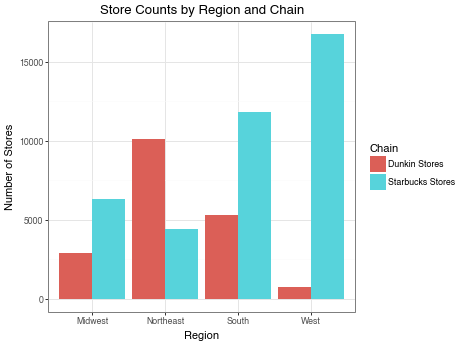

In [25]:
#7 - Graph (bar chart)
from plotnine import ggplot, aes, geom_bar, labs, theme_bw
import pandas as pd

df_final[['Starbucks Stores', 'Dunkin Stores']] = (
    df_final[['Starbucks Stores', 'Dunkin Stores']]
    .replace('', '0')  
    .fillna(0)  
    .astype(str)  
    .apply(lambda x: x.str.replace(',', '', regex=True))  
    .astype(int)  
)

region_data = df_final.groupby('Region')[['Starbucks Stores', 'Dunkin Stores']].sum().reset_index()

region_data_melted = region_data.melt(
    id_vars='Region', var_name='Chain', value_name='Stores'
)

plot = (
    ggplot(region_data_melted, aes(x='Region', y='Stores', fill='Chain')) +
    geom_bar(stat='identity', position='dodge') +
    labs(title='Store Counts by Region and Chain', x='Region', y='Number of Stores') +
    theme_bw()
)

print(plot)


/var/folders/jb/g1z659_j7g7g3c677k1x2bsc0000gn/T/ipykernel_42033/51356817.py:25: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


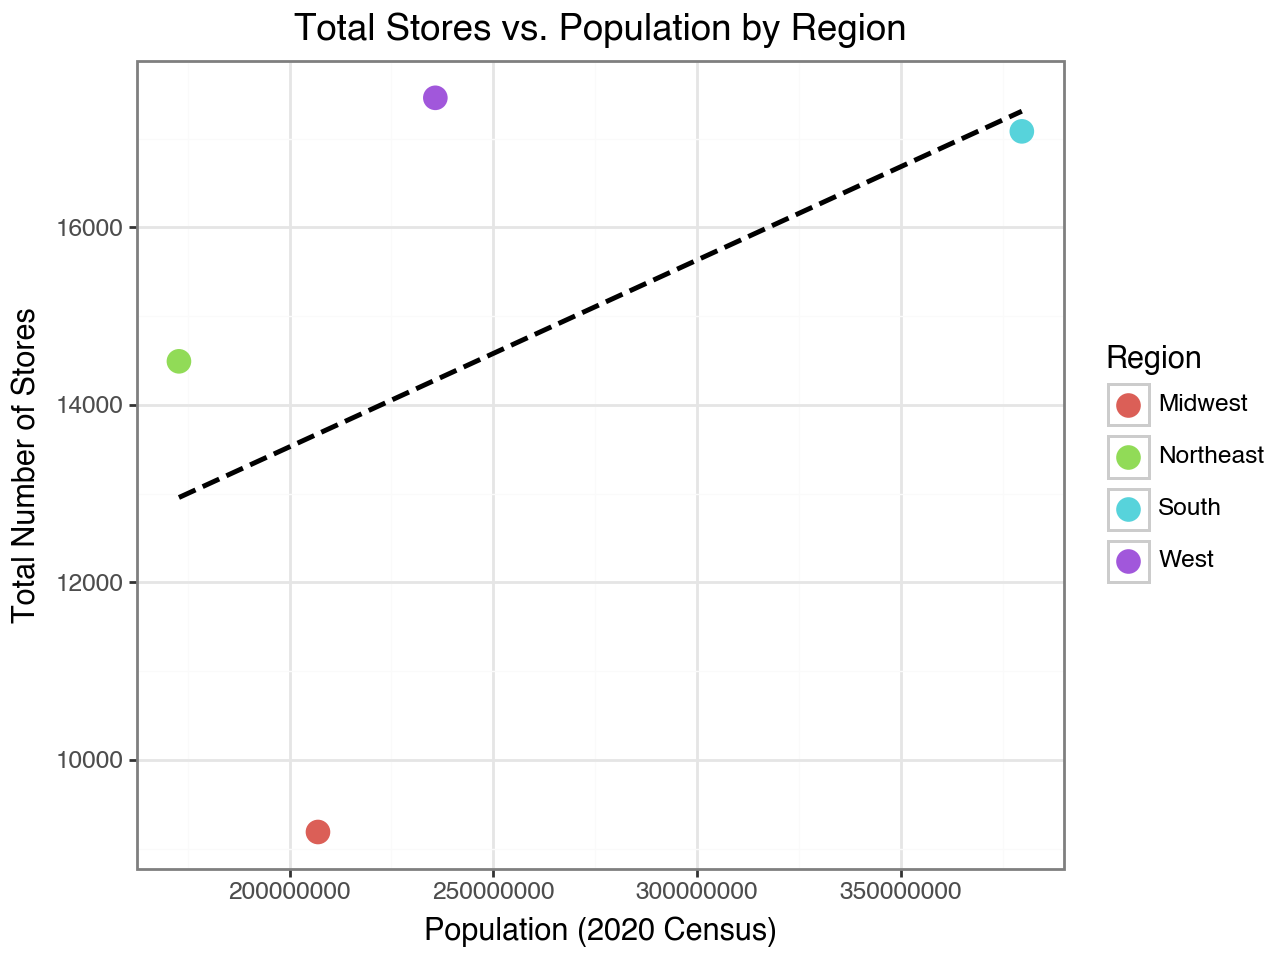

In [26]:
#7 - Graph (Scatter Plot)
from plotnine import ggplot, aes, geom_point, geom_smooth, labs, theme_bw

df_final['Total Stores'] = (
    df_final[['Starbucks Stores', 'Dunkin Stores']].fillna(0).astype(int).sum(axis=1)
)

region_population = df_final.groupby('Region').agg({
    'Population_2020': 'sum',
    'Total Stores': 'sum'
}).reset_index()

plot = (
    ggplot(region_population, aes(x='Population_2020', y='Total Stores', color='Region')) +
    geom_point(size=4) + 
    geom_smooth(method='lm', se=False, linetype='dashed', color='black') +  #ChatGPT - Create Linear trendline
    labs(title='Total Stores vs. Population by Region',
         x='Population (2020 Census)', y='Total Number of Stores') +
    theme_bw()
)

print(plot)


From the grpahs above, we can see that Starbucks has the highest amount of stores in the West and Midwest region (Claifornia, Oregon, Washington). Dunkin on the other hand has a stronger presence in the Northeast, with states Like New York and New Jersey. We can also see that the financial impact of having more stores in highly populated regions (like California) versus less populated ones (like Wyoming) reflects how concentrated stores in popular areas can support stock prices. This means that Starbucks benefits from having stores everywhere, while Dunkin' relies more on selective regional places to conentrate stores. For Starbucks we cans that there is a postive correlation between population and store count. However, for Dunkin we can see there are some outliers having more stores than expected for their population size (Northeast). Finally, yest the financial ata alligns with what we would expect. Starbucks stock data shows that having a wide spread store distribtuionm creates a more steady stock. While Dunkin, relies on key regions in order to sustain finanical performance. 


In [28]:
#Automation - McDonald
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

valid_states = [
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 
    'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 
    'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 
    'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 
    'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 
    'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 
    'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 
    'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 
    'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 
    'Wisconsin', 'Wyoming'
]

def scrape_store_data(url):
    try:
        company_name = re.search(r'/location-reports/([^/]+)/?', url).group(1).replace('-', ' ').title()
    except AttributeError:
        print("Could not extract the company name from the URL.")
        return None

    response = requests.get(url)
    response.raise_for_status()  

    soup = BeautifulSoup(response.content, 'html.parser')

    table = soup.find('table')
    if table is None:
        print("No table found on the webpage.")
        return None  # Stop if no table is found

    data = []
    for row in table.find_all('tr')[1:]:  
        cols = [col.text.strip() for col in row.find_all(['th', 'td'])]

        if len(cols) >= 2 and cols[0] in valid_states:
            state = cols[0]
            locations = re.sub(r'[^\d]', '', cols[1])  #ChatGPT - Remove non-digit characters
            data.append([state, int(locations)])

    df = pd.DataFrame(data, columns=['State', 'Locations'])
    df['Company'] = company_name

    return df

url = 'https://www.scrapehero.com/location-reports/McDonalds-USA/'
df = scrape_store_data(url)

if df is not None:
    print(df.head(50))  
else:
    print("Failed to scrape data from the provided URL.")


            State  Locations        Company
0           Texas      11719  Mcdonalds Usa
1         Florida       8786  Mcdonalds Usa
2        Illinois       6405  Mcdonalds Usa
3            Ohio       6135  Mcdonalds Usa
4        New York       5734  Mcdonalds Usa
5        Michigan       5244  Mcdonalds Usa
6    Pennsylvania       4754  Mcdonalds Usa
7  North Carolina       4703  Mcdonalds Usa
8         Georgia       4443  Mcdonalds Usa


In [27]:
#Automation - Wendy's
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

valid_states = [
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 
    'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 
    'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 
    'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 
    'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 
    'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 
    'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 
    'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 
    'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 
    'Wisconsin', 'Wyoming'
]

def scrape_store_data(url):
    try:
        company_name = re.search(r'/location-reports/([^/]+)/?', url).group(1).replace('-', ' ').title()
    except AttributeError:
        print("Could not extract the company name from the URL.")
        return None

    response = requests.get(url)
    response.raise_for_status() 
    soup = BeautifulSoup(response.content, 'html.parser')

    table = soup.find('table')
    if table is None:
        print("No table found on the webpage.")
        return None  

    data = []
    for row in table.find_all('tr')[1:]:  
        cols = [col.text.strip() for col in row.find_all(['th', 'td'])]

        if len(cols) >= 2 and cols[0] in valid_states:
            state = cols[0]
            locations = re.sub(r'[^\d]', '', cols[1])  #ChatGPT - Remove non-digit characters
            data.append([state, int(locations)])

    df = pd.DataFrame(data, columns=['State', 'Locations'])
    df['Company'] = company_name

    return df

url = 'https://www.scrapehero.com/location-reports/Wendys-USA/'
df = scrape_store_data(url)

if df is not None:
    print(df.head(50))  
else:
    print("Failed to scrape data from the provided URL.")


            State  Locations     Company
0           Texas       4678  Wendys Usa
1            Ohio       4077  Wendys Usa
2      California       2975  Wendys Usa
3         Georgia       2975  Wendys Usa
4  North Carolina       2654  Wendys Usa
5    Pennsylvania       2584  Wendys Usa
6        Michigan       2414  Wendys Usa
7        New York       2314  Wendys Usa
8        Virginia       2204  Wendys Usa
